<a href="https://colab.research.google.com/github/hinimdoumorsia/projet_Series_chronologiques/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analyse exploratoire des données**

**importation des librairies necessaires**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Feature engenering**

**chargement du jeu de donnée**



In [4]:
data = pd.read_csv('/content/drive/MyDrive/timeSerie/bitcoin_full_dataset.csv')
data["Date"] = pd.to_datetime(data["Date"])
data.head()

,Date,Close,High,Low,Open,Volume,fear_greed,TxTfrCnt,TxCnt,AdrActCnt
0,2019-03-15,3960.911133,3968.542969,3914.015381,3926.663330,9394210605,55.0,693632.0,296890,715166
1,2019-03-16,4048.725830,4077.036377,3961.657471,3963.900146,9856166973,54.0,577534.0,257699,602121
2,2019-03-17,4025.229004,4054.122070,4006.411133,4047.719482,8221625400,58.0,516619.0,229399,548345
3,2019-03-18,4032.507324,4071.556641,4009.117188,4029.968506,9646954186,56.0,681426.0,295707,720573
4,2019-03-19,4071.190186,4082.216064,4023.812500,4032.691895,9344919956,56.0,683603.0,299996,739893


La **volatilité** représente l’ampleur des fluctuations de prix d’un actif sur une période donnée.

**Cible secondaire** : On pourrez aussi prédire la volatilité future (utile pour les options ou le risque.Les traders se basent sur cette métrique pour ajuster leurs stratégies).

In [ ]:
data['Volatility'] = (data['High'] - data['Low']) / data['Low'] * 100

Le **RSI** est un oscillateur de momentum qui mesure la vitesse et l’ampleur des variations de prix sur une période donnée (généralement 14 jours).
Le RSI n’est pas simplement une transformation linéaire des prix, il capture le **momentum** du marché, ce qui peut être une information complémentaire précieuse.

**-->**Si RSI > 70 → Bitcoin est en zone de surachat → Risque de diminution du prix(Ce qui incite les traders à vendre).

**-->**Si RSI < 30 → Bitcoin est en zone de survente → Potentiel rebond haussier(signalant une opportunité d'achat potentiel)

**Exemple** :

**~**Si on entraîne un modèle avec seulement Close, High, Low, Open, il ne comprend que la structure des prix.

**~**Avec RSI comme feature, le modèle a une mesure directe de la dynamique du marché.

In [ ]:
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))
data

,Date,Close,High,Low,Open,Volume,fear_greed,Volatility,RSI
0,2019-03-15,3960.911133,3968.542969,3914.015381,3926.663330,9394210605,55.0,1.393137,NaN
1,2019-03-16,4048.725830,4077.036377,3961.657471,3963.900146,9856166973,54.0,2.912390,NaN
2,2019-03-17,4025.229004,4054.122070,4006.411133,4047.719482,8221625400,58.0,1.190865,NaN
3,2019-03-18,4032.507324,4071.556641,4009.117188,4029.968506,9646954186,56.0,1.557436,NaN
4,2019-03-19,4071.190186,4082.216064,4023.812500,4032.691895,9344919956,56.0,1.451448,NaN
...,...,...,...,...,...,...,...,...,...
2188,2025-03-11,82862.210938,83577.757812,76624.250000,78523.875000,54702837196,24.0,9.074814,43.342484
2189,2025-03-12,83722.359375,84358.578125,80635.250000,82857.375000,40353484454,34.0,4.617494,49.230449
2190,2025-03-13,81066.703125,84301.695312,79931.851562,83724.921875,31412940153,45.0,5.466962,45.758951
2191,2025-03-14,83969.101562,85263.289062,80797.562500,81066.992188,29588112414,27.0,5.527056,49.555716


Pour calculer la première valeur du RSI, il faut 14 valeurs de gains et pertes(14 premiers jours).

 Donc, pour les 13 premières lignes, la moyenne mobile ne peut pas être calculée, et elles restent NaN.

# **Colonne**--------**Description**

**Date**	: Date de l'enregistrement des données (format YYYY-MM-DD).

**Close** : Prix de clôture du Bitcoin à cette date.

**High** : Prix le plus haut atteint par le Bitcoin durant cette journée.

**Low** :	Prix le plus bas atteint par le Bitcoin durant cette journée.

**Open** : Prix d'ouverture du Bitcoin à cette date.

**Volume**	: Volume total de Bitcoin échangé durant cette journée.

**fear_greed** :	Indice de sentiment du marché basé sur la peur et la cupidité.

In [ ]:
print(data.isnull().sum())

Date           0
Close          0
High           0
Low            0
Open           0
Volume         0
fear_greed     1
Volatility     0
RSI           13
dtype: int64


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2193 non-null   datetime64[ns]
 1   Close       2193 non-null   float64       
 2   High        2193 non-null   float64       
 3   Low         2193 non-null   float64       
 4   Open        2193 non-null   float64       
 5   Volume      2193 non-null   int64         
 6   fear_greed  2192 non-null   float64       
 7   Volatility  2193 non-null   float64       
 8   RSI         2180 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 154.3 KB
None


In [ ]:
data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,2193,2022-03-14 23:59:59.999999744,2019-03-15 00:00:00,2020-09-13 00:00:00,2022-03-15 00:00:00,2023-09-14 00:00:00,2025-03-15 00:00:00,NaN
Close,2193.0,34577.254465,3960.911133,11584.93457,29176.916016,49368.847656,106146.265625,24341.695149
High,2193.0,35296.671367,3968.542969,11800.064453,29498.009766,50797.164062,109114.882812,24846.611684
Low,2193.0,33750.217823,3914.015381,11296.993164,28720.271484,47925.855469,105291.734375,23769.740067
Open,2193.0,34542.527953,3926.66333,11548.719727,29169.074219,49413.480469,106147.296875,24329.020512
Volume,2193.0,31835523422.981304,5331172801.0,18927080224.0,27773333680.0,39006849170.0,350967941479.0,19321455743.148724
fear_greed,2192.0,49.855839,5.0,30.0,50.0,70.0,95.0,22.051954
Volatility,2193.0,4.529621,0.359616,2.307852,3.653107,5.590037,63.138656,3.680877
RSI,2180.0,53.410094,4.699489,40.76242,52.581676,65.973856,99.219494,18.076001


**.Close** (Prix de Clôture) :

**~**Moyenne : 34 577 $ (Prix moyen du Bitcoin sur la période).

**~**Étendue : De 3960 à 106146 $ montrant une forte volatilité historique.

**~**Écart-type : 24 341 $, indiquant une grande dispersion autour de la moyenne.

**.Volume**

**~**Moyenne : Le volume moyen des transactions est de 31,835,520,000 (environ 31.8 milliards).

**~**Min : Le volume minimum est 5.33 milliards, ce qui représente probablement une période de faible activité.

**~**Max : Le volume maximum est de 350.97 milliards, indiquant des pics d'activité importants(Le 26 février 2021, le marché du Bitcoin a connu une volatilité notable, marquée par une baisse significative de son prix. Cette chute est survenue dans un contexte où, quelques jours auparavant, le Bitcoin avait atteint un nouveau record en dépassant les 50 000 dollars le 16 février 2021.

**.Volatility** (Volatilité Journalière)

**~**Moyenne : 4.53% (variation journalière moyenne entre High et Low).

**~**Max : 63.13% (journée de trading extrêmement volatile).

Ce jour correspond au 12 mars 2020, surnommé le **jeudi noir** dans la communauté des cryptomonnaies, le Bitcoin a subi une chute spectaculaire de près de 50 % de sa valeur en une seule journée. Le prix du Bitcoin est passé d'environ 7 900 dollars à 4 860 dollars, reflétant une panique généralisée sur les marchés financiers dûe à la pandémie de **Covid-19**

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Prix Bitcoin
fig.add_trace(
    go.Scatter(x=data['Date'], y=data['Close'], name="Bitcoin Price", line=dict(color='blue')),
    secondary_y=False,
)

# Fear & Greed
fig.add_trace(
    go.Scatter(x=data['Date'], y=data['fear_greed'], name="Fear & Greed", line=dict(color='red', dash='dot')),
    secondary_y=True,
)

fig.update_layout(
    title="Bitcoin Price vs Fear & Greed Index",
    hovermode="x unified"  # Affiche les deux valeurs au survol
)

fig.show()

In [ ]:
for lag in [1, 3, 7, 15, 30, 60, 61, 70]:
    data[f'fear_greed_lag_{lag}'] = data['fear_greed'].shift(lag)
    correlation_lag = data[['Close', f'fear_greed_lag_{lag}']].corr()
    print(f"Corrélation avec un décalage de {lag} jours :\n", correlation_lag, "\n")


Corrélation avec un décalage de 1 jours :
                      Close  fear_greed_lag_1
Close             1.000000          0.330613
fear_greed_lag_1  0.330613          1.000000 

Corrélation avec un décalage de 3 jours :
                      Close  fear_greed_lag_3
Close             1.000000          0.335399
fear_greed_lag_3  0.335399          1.000000 

Corrélation avec un décalage de 7 jours :
                      Close  fear_greed_lag_7
Close             1.000000          0.346384
fear_greed_lag_7  0.346384          1.000000 

Corrélation avec un décalage de 15 jours :
                       Close  fear_greed_lag_15
Close              1.000000           0.367282
fear_greed_lag_15  0.367282           1.000000 

Corrélation avec un décalage de 30 jours :
                       Close  fear_greed_lag_30
Close              1.000000           0.396577
fear_greed_lag_30  0.396577           1.000000 

Corrélation avec un décalage de 60 jours :
                       Close  fear_greed_la

**📈 Le sentiment du marché (Fear & Greed) semble avoir un effet retardé sur le prix du Bitcoin, avec un délai optimal d’environ 30 jours. C'est à dire que son impact met plusieurs jours à se répercuter sur le marché !**

**Visualisation**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
def process_and_plot_timeseries(df):
    # Vérification si la colonne 'Date' existe
    if 'Date' not in df.columns:
        raise ValueError("La colonne 'Date' est absente du DataFrame.")
    # Conversion de la colonne 'Date' en format datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Trier les données par date pour éviter des erreurs d'affichage
    df = df.sort_values(by='Date')
    # Colonnes à tracer
    primary_columns = ['Close', 'High', 'Low', 'Open', 'fear_greed', 'Volatility', 'RSI']  # Échelle normale
    secondary_columns = ['Volume']  # Échelle secondaire (grandes valeurs)
    # Vérification des colonnes
    missing_cols = [col for col in primary_columns + secondary_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Les colonnes suivantes sont absentes du DataFrame : {missing_cols}")
    # Création du graphique avec un axe secondaire
    fig, ax1 = plt.subplots(figsize=(14, 7))
    # Tracé des variables principales
    for col in primary_columns:
        ax1.plot(df['Date'], df[col], label=col, alpha=0.7)
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Valeurs (prix, indicateurs)")
    ax1.tick_params(axis='y')
    # Création d'un deuxième axe Y pour les variables volumineuses
    ax2 = ax1.twinx()
    for col in secondary_columns:
        ax2.plot(df['Date'], df[col], label=col, linestyle="dashed", alpha=0.7, color='red')
    ax2.set_ylabel("Volume")
    ax2.tick_params(axis='y', colors='red')
    # Ajout des légendes
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.title("Évolution des indicateurs financiers au fil du temps")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

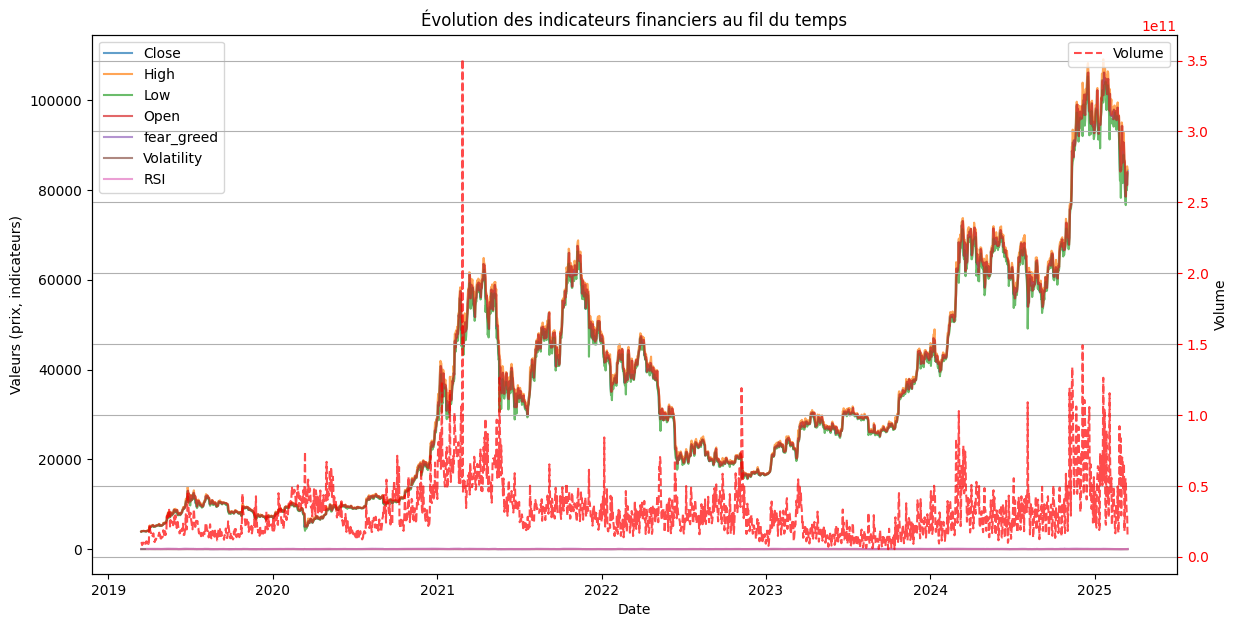

None


In [ ]:
resultat=process_and_plot_timeseries(data)
print(resultat)

**INTERPRETATION**

**Interprétation des graphes :**

Caractéristiques **'High'**, **'Low'**, **'Open'**, **'Close'** : Sur le graphique, nous observons que ces quatre caractéristiques évoluent de manière presque identique au cours du temps (de 2019 à 2025). Cette similarité suggère une forte corrélation entre elles, ce qui est tout à fait logique dans le contexte des prix financiers. Les variations de **"High"** (le plus haut prix), **"Low"** (le plus bas prix), **"Open"** (le prix d'ouverture) et **"Close"** (le prix de clôture) sont proportionnelles, car elles sont directement liées à l'évolution du prix du Bitcoin. L'évolution de ces quatre variables est très semblable car elles sont intrinsèquement liées et suivent des dynamiques similaires sur les périodes de marché.

**RSI (Relative Strength Index)** : La courbe du RSI montre une évolution très différente de celle des prix, avec une relative stabilité au fil du temps. En effet, contrairement aux autres indicateurs qui suivent les variations des prix du Bitcoin, le RSI semble capturer un aspect plus sous-jacent du marché. Ce qui est intéressant ici, c'est que bien que le prix du Bitcoin fluctue, le RSI reste stationnaire, indiquant que l'indice de force relative reste stable. Cela peut suggérer que le RSI se comporte davantage comme un indicateur de momentum. Il transforme les prix linéairement et capte des informations sur la force ou la faiblesse des mouvements de prix, offrant ainsi un aperçu de l'inertie du marché plutôt que de la direction actuelle des prix.

**Volatilité** : Cette  caractéristique pourrait également indiquer l'activité du marché, mais dans notre cas elle montre des comportements différents en fonction de la dynamique de trading. En analysant de maniére detaillée la volatilité , nous  pouvez obtenir des informations supplémentaires sur l'intensité des fluctuations et l'engagement des traders au fil du temps.

**Analyse univariée**

In [ ]:
def process_and_plot_histograms(df):
    # Vérification si la colonne 'Date' existe
    if 'Date' not in df.columns:
        raise ValueError("La colonne 'Date' est absente du DataFrame.")
    # Conversion de la colonne 'Date' en type datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Colonnes numériques à visualiser
    numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed', 'Volatility', 'RSI']
    # Vérification si toutes les colonnes existent
    missing_cols = [col for col in numeric_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Les colonnes suivantes sont absentes du DataFrame : {missing_cols}")
    # Création des histogrammes avec statistiques et polygone de fréquence
    plt.figure(figsize=(12, 10))
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(3, 3, i)  # 3 lignes, 3 colonnes pour les subplots
        data = df[col].dropna()
        # Histogramme
        counts, bins, _ = plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=False)
        # Polygone de fréquence
        bin_centers = (bins[:-1] + bins[1:]) / 2
        plt.plot(bin_centers, counts, marker='o', linestyle='-', color='red', label='Polygone de fréquence')
        # Calcul des statistiques
        mean_value = np.mean(data)
        std_dev = np.std(data)
        variance = np.var(data)
        median_value = np.median(data)
        min_value = np.min(data)
        max_value = np.max(data)
        # Ajout des statistiques sur le graphe
        stats_text = (f"Moyenne: {mean_value:.2f}\nÉcart-type: {std_dev:.2f}\nVariance: {variance:.2f}\n"
                      f"Médiane: {median_value:.2f}\nMin: {min_value:.2f}\nMax: {max_value:.2f}")
        plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
                 verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.7))
        plt.title(f'Histogramme de {col}')
        plt.xlabel(col)
        plt.ylabel('Fréquence')
        plt.legend()
    plt.tight_layout()
    plt.show()


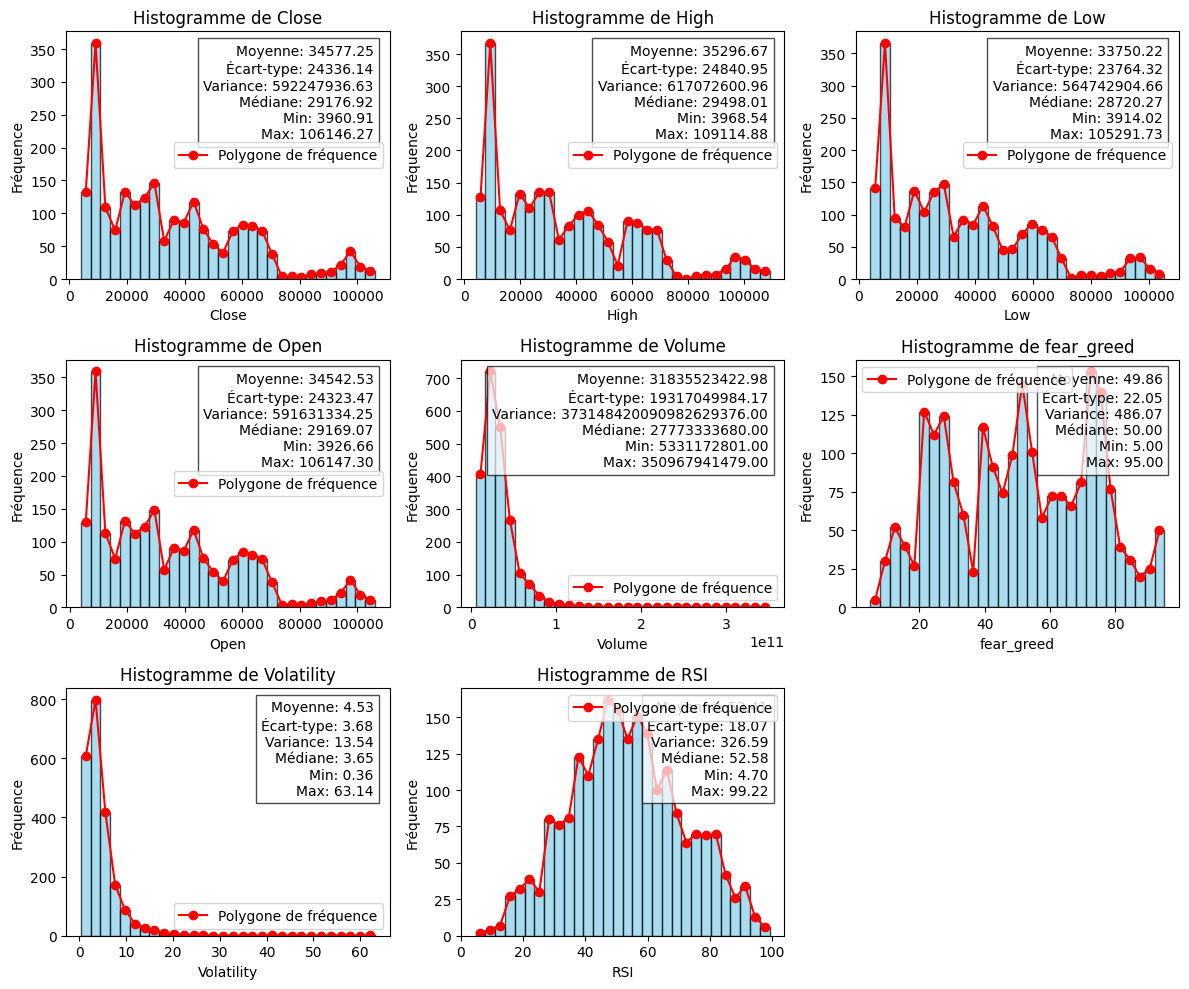

None


In [ ]:
result = process_and_plot_histograms(data)
print(result)

**INTERPRETATION**

Les polygones de fréquence des colonnes Close, High, Low, et Open sont pratiquement identiques, ce qui reflète une distribution similaire de ces variables. Ce phénomène se vérifie tant graphiquement qu'à travers les calculs statistiques, car leurs moyennes, écarts-types, valeurs minimales, maximales, médianes, et variances sont presque identiques.

De plus, toutes ces colonnes présentent une distribution asymétrique, à l'exception de la colonne fear_greed. En effet, pour cette dernière, la médiane est égale à 50 et la moyenne (ou espérance) est de 49,86. Bien que le mode ne soit pas calculé ici, on peut en déduire que la distribution de fear_greed est relativement symétrique, puisque la médiane, la moyenne et le mode se trouvent très proches l'un de l'autre.En outre ,la distribution de RSI est aussi approximativement symetrique car elle a une moyenne de 53.41 et une mediane de 52.58 .

**Difference d'échelle**

​Nos graphiques  présentent les variables Open, High, Low et Close, qui correspondent respectivement aux prix d'ouverture, au plus haut, au plus bas et au prix de clôture d'un actif(bitcoin) sur une période donnée. Ces variables sont souvent représentées sur des échelles de prix élevées, reflétant la volatilité du marché. Une telle volatilité suggère que les investisseurs doivent faire preuve de prudence lors de ces phases, car les fluctuations de prix peuvent entraîner des risques accrus.​

Avant de prendre des décisions d'investissement, il est essentiel que les investisseurs analysent non seulement le prix de clôture, mais également le volume des échanges, le prix d'ouverture, ainsi que les prix les plus bas et les plus hauts atteints au cours de la période considérée. Cette analyse permet d'obtenir une vision plus complète du comportement du marché et d'évaluer les tendances potentielles. Les graphiques OHLC (Open-High-Low-Close) sont particulièrement utiles à cet égard, car ils fournissent une représentation détaillée de ces quatre variables clés, facilitant ainsi l'interprétation des mouvements de prix et l'identification des tendances du marché.

In [ ]:
print(data.columns)
print(len(data.columns))

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed'], dtype='object')
7


**📈 Le sentiment du marché (Fear & Greed) semble avoir un effet retardé sur le prix du Bitcoin, avec un délai optimal d’environ 30 jours. C'est à dire que son impact met plusieurs jours à se répercuter sur le marché !**

**Analyse bivariée**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def bivariate_analysis(df):
    # Vérification si la colonne 'Date' existe
    if 'Date' not in df.columns:
        raise ValueError("La colonne 'Date' est absente du DataFrame.")
    # Conversion de la colonne 'Date' en format datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Liste des colonnes numériques à analyser
    numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed', 'Volatility', 'RSI']
    # Vérification de la présence des colonnes
    missing_cols = [col for col in numeric_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Les colonnes suivantes sont absentes du DataFrame : {missing_cols}")
    # Trier les données par date
    df = df.sort_values(by='Date')
    # 🔹 Affichage des scatter plots (relation entre chaque paire de variables)
    sns.pairplot(df[numeric_columns], diag_kind='kde', plot_kws={'alpha':0.7, 's':10})
    plt.suptitle("Analyse Bivariée - Nuages de points", y=1.02)
    plt.show()
    # 🔹 Matrice de corrélation
    plt.figure(figsize=(8, 6))
    correlation_matrix = df[numeric_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Matrice de Corrélation")
    plt.show()

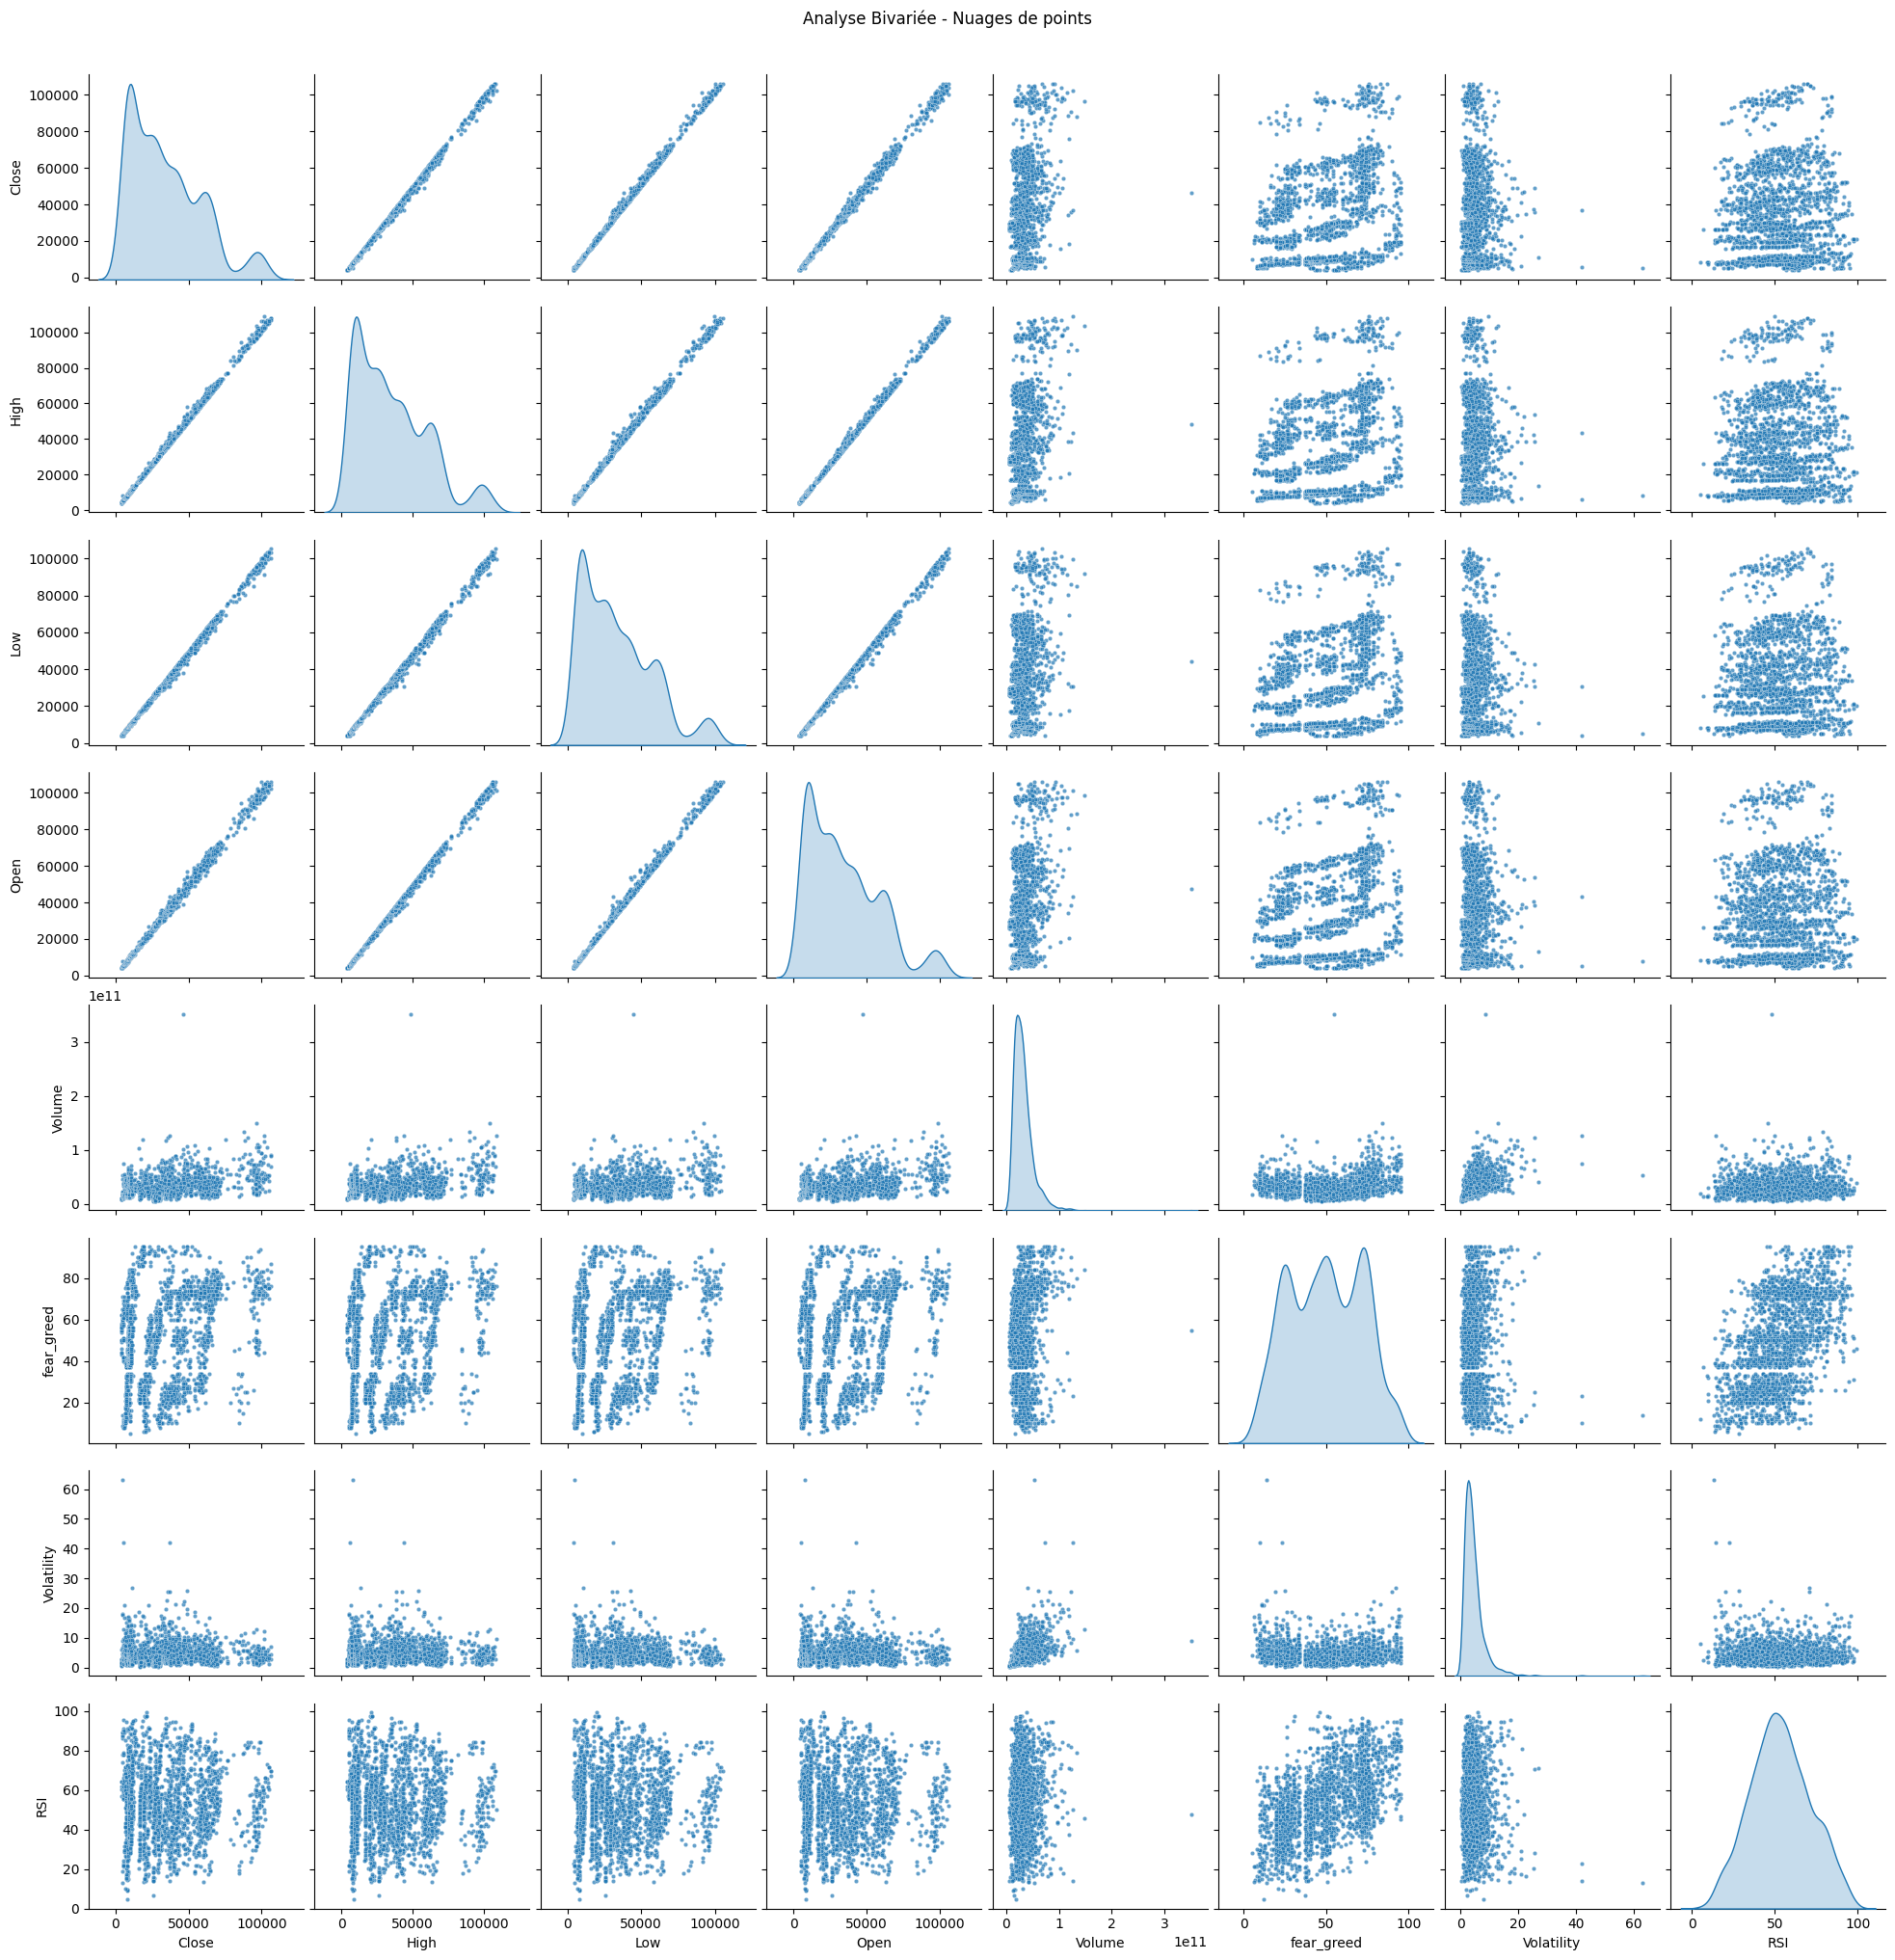

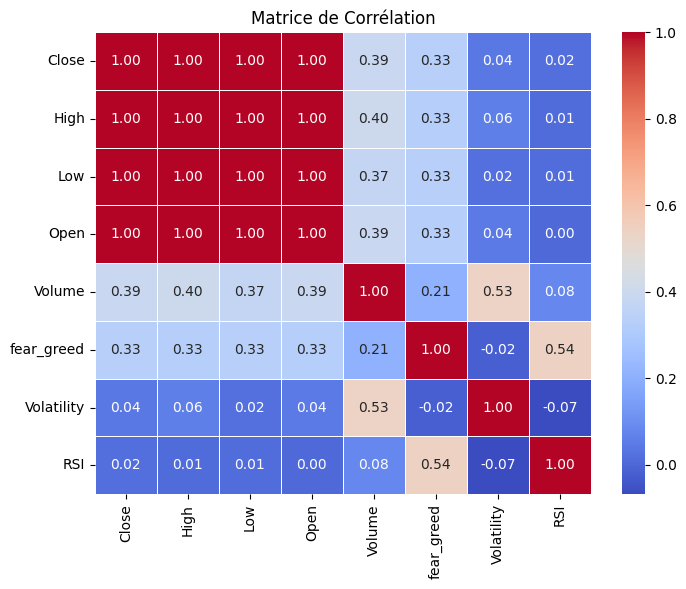

None


In [ ]:
resultat3=bivariate_analysis(data)
print(resultat3)

**Corrélations entre les prix (Close, High, Low, Open) :**

Les prix de clôture(target variable), les prix les plus élevés(High), les prix les plus bas(Low) et les prix d'ouverture(Open) sont fortement corrélés . Cela est logique, car les prix des actifs financiers ont tendance à évoluer ensemble.

**Corrélations avec le volume :**

**~**Le volume a une corrélation modérée (0.37 à 0.4) avec les prix. Cela suggère que les variations de prix sont souvent accompagnées de changements de volume.

**~**Le volume a une corrélation assez forte (0.53) avec la volatilité.Cela signifie que les périodes de forte volatilité sont souvent associées à un volume de transactions élevé (logique car les investisseurs s'empressent de vendre leurs actifs).

**Corrélations avec l'indice fear_greed :**

**~**L'indice fear_greed a une corrélation de 0.33 avec le prix de l'actif. Il y a donc une légère influence du sentiment du marché sur le prix(mais pas **instantanément**).

**Corrélation avec la volatilité :**

**~**La volatilité a une faible corrélation (0.02 à 0.059) avec les prix. Cela indique que les changements de prix ne sont pas forcément en rapport avec la volatilité.

**INTERPRETATION GRAPHIQUE**

Comme dans le cas de la matrice de confusion, les différents graphiques permettent de visualiser l'évolution des différentes variables les unes par rapport aux autres et par rapport à elles-mêmes.

Ce qui est particulièrement intéressant, c'est que :

Les nuages de points sont presque linéaires pour les variables fortement corrélées, indiquant une relation linéaire évidente entre elles.

Pour les variables faiblement corrélées, les nuages de points ont une structure plus dispersée et particulière, ce qui rend la relation linéaire moins évidente entre ces variables.

Cependant, lorsqu'on analyse chaque variable individuellement, on observe graphiquement une courbe représentant son évolution et sa diminution progressive en fonction du temps ou d'elle-même (sauf pour Fear_gread).

Cas particulier de Fear_gread :

Son graphique présente des pics qui indiquent des valeurs marquées, ainsi que des courbes en forme de V.

La partie basse de ces courbes représente les valeurs minimales.

Cela signifie que les valeurs de la ligne Fear_gread en fonction des prix ont une relation linéaire, mais faible

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

features_to_scale = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed', 'Volatility', 'RSI']

data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

Le **RobustScaler** est une méthode de normalisation des données particulièrement adaptée aux jeux de données contenant des outliers comme les données financières.

**Principe :**

**-->**Centre les données autour de la médiane (au lieu de la moyenne pour StandardScaler).

**-->**Met à l'échelle en utilisant l'écart interquartile (IQR) (au lieu de l'écart-type).

**Recherche du meilleur model**

**Test de stationnarité de notre série**

Avant d'estimer un modèle que ce soit **AR(p),MA(q),ARMA(p,q),ARIMA(p,I,q)** OU **SARIMA(p, d, q)(P, D, Q, s)** etc,et  de déterminer son ordre, il est important de s'assurer que la série à modéliser est stationnaire. Une série est considérée comme stationnaire lorsque ses propriétés statistiques, telles que la moyenne, la variance et la covariance, ne varient pas avec le temps. Les modèles (sité ci-dessus) sont construits sur l'hypothèse que la série est stationnaire, et ne sont donc pas appropriés pour des séries non stationnaires.
Si une série n'est pas stationnaire, il est nécessaire de la transformer pour la rendre stationnaire avant d'estimer le modèle . Pour ce faire, on peut utiliser l'autocorrélogramme et les test de Dickey-Fuller, PP et KPSS pour détecter la présence de tendances et de saisonnalité dans la série. Si des tendances sont présentes, on peut les éliminer en différenciant la série. Ensuite, on peut estimer le modèle  à partir de la série différenciée pour obtenir des prévisions fiables.

**reherche manuelle des meilleurs parametre de la serie**

**automatisation de recherche de meilleur parametre**

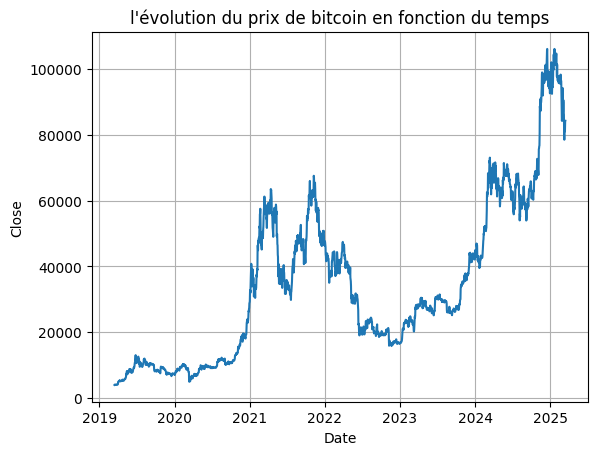

In [ ]:
plt.plot(data['Date'],data['Close'],label="prix de fermeture de bitcoin en fonction du temps")
plt.title("l'évolution du prix de bitcoin en fonction du temps")
plt.xlabel("Date")
plt.ylabel('Close')
plt.grid(True)
plt.show()

**Interpretation du prix**

​L'analyse graphique de notre série temporelle révèle une tendance significative à la hausse, indiquant que la moyenne (espérance) de la série n'est pas constante dans le temps. De plus, une augmentation notable de la dispersion des valeurs suggère une variance non constante. Ces observations conduisent à conclure que votre série "Close" est non stationnaire.

**Stationarisation de la serie par le passage au log ou une differenciation**

**transformation logarithmique**

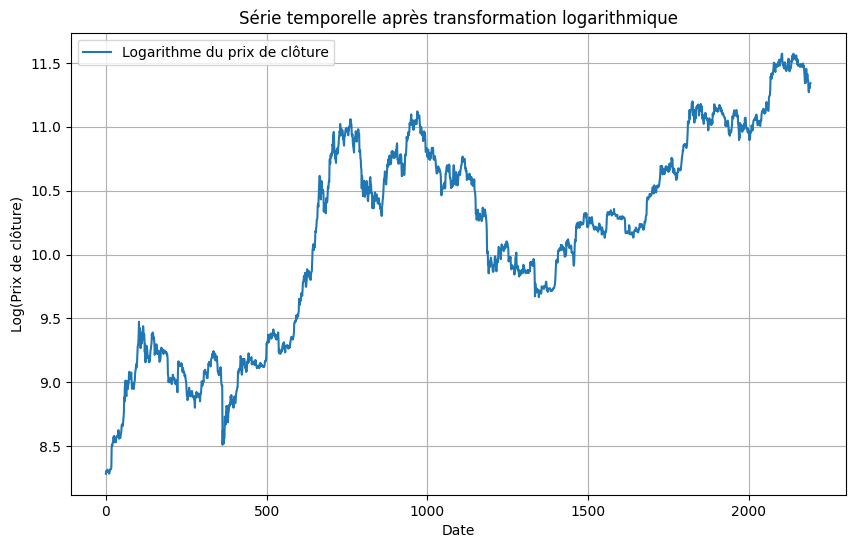

In [ ]:
data['Close_log'] = np.log(data['Close'])
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close_log'], label='Logarithme du prix de clôture')
plt.xlabel('Date')
plt.ylabel('Log(Prix de clôture)')
plt.title('Série temporelle après transformation logarithmique')
plt.legend()
plt.grid()
plt.show()

​Après avoir appliqué une transformation logarithmique sans parvenir à stabiliser la variance de la série, il est judicieux d'envisager une différenciation pour atteindre la stationnarité.

**Application de la différenciation**

La différenciation est une technique essentielle en analyse des séries temporelles, utilisée pour transformer une série non stationnaire en une série stationnaire.

**Concept de la différenciation :**

La différenciation consiste à calculer la différence entre les valeurs successives d'une série temporelle. Cette opération permet d'éliminer les tendances et de stabiliser la moyenne de la série. Mathématiquement, la différenciation d'ordre 1 d'une série \( y_t \) est définie par :

$$
\Delta y_t = y_t - y_{t-1}
$$

où \( \Delta y_t \) représente la série différenciée, \( y_t \) la valeur actuelle, et \( y_{t-1} \) la valeur précédente.

Si une seule différenciation ne suffit pas à rendre la série stationnaire, une différenciation d'ordre supérieur peut être appliquée. Par exemple, la différenciation d'ordre 2 est obtenue en différenciant une seconde fois la série :

$$
\Delta^2 y_t = \Delta y_t - \Delta y_{t-1} = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) = y_t - 2y_{t-1} + y_{t-2}
$$

**Remarque :**

Il est important de noter que la différenciation peut introduire de l'autocorrélation dans la série différenciée. Par conséquent, après avoir différencié une série, il est recommandé de vérifier à nouveau sa stationnarité et d'examiner les autocorrélations pour s'assurer que la série est appropriée pour la modélisation.

En résumé, la différenciation est une méthode clé pour traiter les séries temporelles non stationnaires, en éliminant les tendances et en stabilisant la moyenne, ce qui est essentiel pour une analyse et une modélisation efficaces.


**Stationarité de serie temporelle**

L'analyse de la stationnarité guide le choix des modèles à utiliser. Par exemple, les modèles AR,MA,ARIMA,SARIMA nécessitent une stationnarité de la série. Si une série est non stationnaire, des transformations telles que la différenciation sont appliquées pour atteindre la stationnarité avant la modélisation.

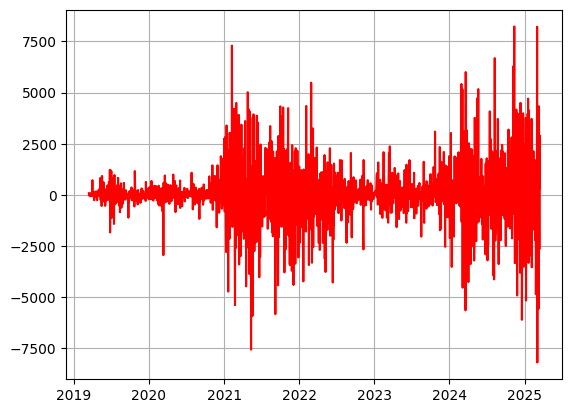

In [ ]:
data['Close_diff'] = data['Close'].diff()
plt.plot(data['Date'],data['Close_diff'],color='red',label='la courbe representative de la serie differenciée en fonction du temps')
plt.grid(True)
plt.show()

**Analyse de la stationnarité de notre série temporelle est pertinente. Nous observons que l'espérance semble constante, mais que la variance présente des variations selon les périodes considérées. Pour confirmer la stationnarité de manière rigoureuse, il sera recommandé d'utiliser des tests statistiques spécifiques tels que le test de Dickey-Fuller augmenté (ADF), le test de Kwiatkowski-Phillips-Schmidt-Shin (KPSS) et le test de Phillips-Perron (PP)**

**Les Tests du stationarité(ADF,KPSS,PP)**

In [ ]:
pip install tabulate colorama

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from tabulate import tabulate
from colorama import Fore, Style

In [ ]:
def run_stationarity_tests(series, name="Série"):
    # Test ADF
    adf_result = adfuller(series, autolag='AIC')
    adf_stat, adf_pvalue, _, _, adf_crit_values, _ = adf_result
    # Test KPSS
    kpss_result = kpss(series, regression='c', nlags='auto')
    kpss_stat, kpss_pvalue, _, kpss_crit_values = kpss_result
    # Conclusion avec mise en couleur
    adf_conclusion = f"{Fore.GREEN}Stationnaire{Style.RESET_ALL}" if adf_pvalue < 0.05 else f"{Fore.RED}Non Stationnaire{Style.RESET_ALL}"
    kpss_conclusion = f"{Fore.GREEN}Stationnaire{Style.RESET_ALL}" if kpss_pvalue > 0.05 else f"{Fore.RED}Non Stationnaire{Style.RESET_ALL}"
    # Préparation des données pour le tableau
    results = [
        ["ADF", adf_stat, adf_pvalue, adf_crit_values['1%'], adf_conclusion],
        ["KPSS", kpss_stat, kpss_pvalue, kpss_crit_values['1%'], kpss_conclusion]
    ]
    # Affichage des résultats
    print(f"\n{name}:")
    print(tabulate(results, headers=["Test", "Statistique", "p-value", "Valeur Critique (1%)", "Conclusion"], tablefmt="grid"))


In [ ]:
run_stationarity_tests(data['Close'], "Série Originale")
run_stationarity_tests(data['Close'].diff().dropna(), "Série Différenciée (1er ordre)")


Série Originale:
+--------+---------------+-----------+------------------------+------------------+
| Test   |   Statistique |   p-value |   Valeur Critique (1%) | Conclusion       |
+========+===============+===========+========================+==================+
| ADF    |     -0.918844 |  0.781703 |               -3.43337 | Non Stationnaire |
+--------+---------------+-----------+------------------------+------------------+
| KPSS   |      4.07192  |  0.01     |                0.739   | Non Stationnaire |
+--------+---------------+-----------+------------------------+------------------+

Série Différenciée (1er ordre):
+--------+---------------+-------------+------------------------+--------------+
| Test   |   Statistique |     p-value |   Valeur Critique (1%) | Conclusion   |
+========+===============+=============+========================+==============+
| ADF    |     -8.47974  | 1.40365e-13 |               -3.43337 | Stationnaire |
+--------+---------------+-------------+----

<ipython-input-20-1e4783cd4f87>:6: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


<ipython-input-20-1e4783cd4f87>:6: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




**Interprétation des résultats :**

**Série Originale :**

**Test ADF** : La statistique de test (-0,918844) est supérieure à la valeur critique au niveau de 1% (-3,43337), et la p-value associée (0,781703) est bien supérieure au seuil de 0,05. Cela signifie que l'on ne peut pas rejeter l'hypothèse nulle de non-stationnarité, suggérant que la série originale est non stationnaire.​

**Test KPSS** : La statistique de test (4,07192) dépasse largement la valeur critique au niveau de 1% (0,739), avec une p-value de 0,01. Cela conduit au rejet de l'hypothèse nulle de stationnarité, indiquant également que la série originale est non stationnaire.

**Série Différenciée (1er ordre)** :

**Test ADF** : La statistique de test (-8,47974) est inférieure à la valeur critique au niveau de 1% (-3,43337), et la p-value (1,40365e-13) est extrêmement faible, bien en dessous de 0,05. Cela permet de rejeter l'hypothèse nulle de non-stationnarité, suggérant que la série différenciée est stationnaire.​

**Test KPSS** : La statistique de test (0,109406) est inférieure à la valeur critique au niveau de 1% (0,739), avec une p-value de 0,1. Cela signifie que l'on ne rejette pas l'hypothèse nulle de stationnarité, indiquant que la série différenciée est stationnaire.

**ACF ET PACF**

Utilisation de l'ACF et de la PACF pour le choix des paramètres des modèles **AR, MA et ARIMA** :

**Modèle Autorégressif (AR(p))** :

**ACF :** Décroît progressivement vers zéro.​

**PACF :** Présente un découpage net après le lag p, avec des coefficients significatifs jusqu'au lag p et insignifiants au-delà.​

**Conclusion :** Si la PACF montre un arrêt brusque après un certain lag p, cela suggère un modèle AR(p).​

**Modèle à Moyenne Mobile (MA(q))** :

**ACF :** Présente un découpage net après le lag q, avec des coefficients significatifs jusqu'au lag q et insignifiants au-delà.​

**PACF :** Décroît progressivement vers zéro.​

**Conclusion :** Si l'ACF montre un arrêt brusque après un certain lag q, cela suggère un modèle MA(q).​

**Modèle ARIMA(p,d,q)**:
**PACF :** Si la PACF montre un arrêt brusque après p lags, cela suggère la présence d'une composante AR(p).

**ACF :** Si l'ACF montre un arrêt brusque après q lags, cela suggère la présence d'une composante MA(q).

**Fonction d'Autocorrélation (ACF)** : L'ACF mesure la corrélation entre une observation et ses décalages successifs (lags). Elle indique dans quelle mesure les valeurs passées influencent les valeurs présentes de la série. En examinant le graphique de l'ACF, on peut détecter des structures répétitives ou des tendances dans les données

**Fonction d'Autocorrélation Partielle (PACF)** : La PACF mesure la corrélation entre une observation et ses décalages, tout en éliminant l'influence des décalages intermédiaires. Autrement dit, elle évalue la relation directe entre une observation et un lag spécifique, sans l'effet des autres lags. Cela permet d'identifier le nombre exact de lags pertinents à inclure dans un modèle autorégressif.

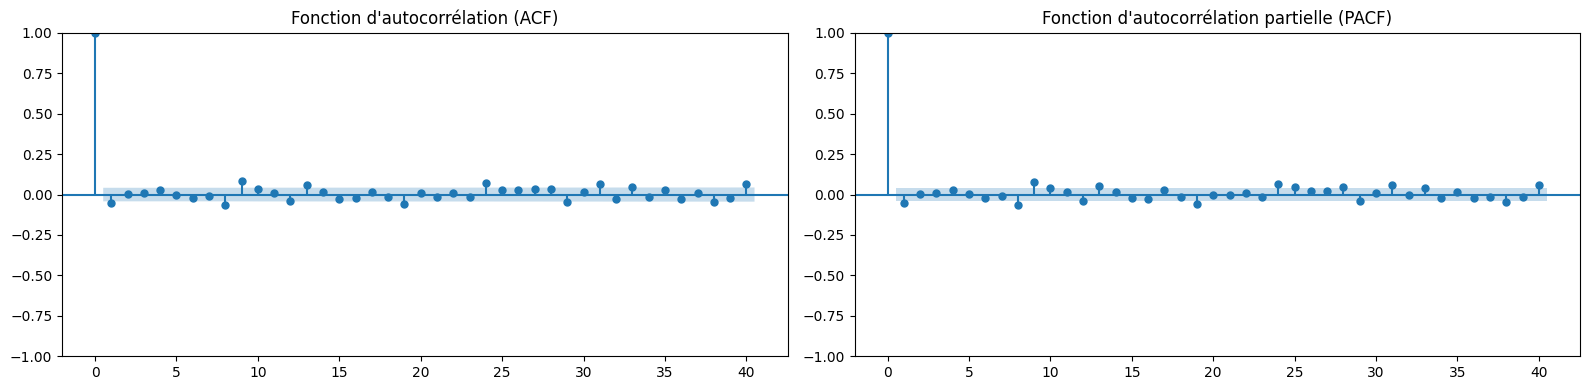

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Différencier la série pour obtenir une série stationnaire
data_diff = data['Close'].diff().dropna()
# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
# Tracer l'ACF
plot_acf(data_diff, ax=axes[0], lags=40)
axes[0].set_title('Fonction d\'autocorrélation (ACF)')
# Tracer la PACF
plot_pacf(data_diff, ax=axes[1], lags=40)
axes[1].set_title('Fonction d\'autocorrélation partielle (PACF)')
plt.tight_layout()
plt.show()

Après avoir examiné les graphiques de l'ACF et du PACF de la série différenciée, nous observons que :

**ACF :** La fonction d'autocorrélation présente une décroissance progressive vers zéro, suggérant une dépendance à long terme dans les données.​

**PACF :** La fonction d'autocorrélation partielle montre une coupure nette après le premier lag (p=1), avec des coefficients significatifs jusqu'à ce lag et insignifiants au-delà. Cela indique que chaque observation est principalement influencée par l'observation immédiatement précédente.​

Ces observations conduisent à proposer un modèle autorégressif d'ordre 1 (**AR(1)**), où la valeur actuelle dépend principalement de la valeur précédente.​

De plus, en appliquant une analyse similaire à la série non différenciée, j'ai identifié un modèle de moyenne mobile d'ordre 1 (**MA(1)**), suggérant que l'observation actuelle est influencée par l'erreur de prévision précédente.​

En combinant ces résultats, il apparaît qu'un modèle **ARMA(1,1)** pourrait être approprié pour la série non différenciée. Cependant, comme la série a déjà été différenciée pour atteindre la stationnarité, le modèle correspondant serait un **ARIMA(1,1,1)**, intégrant à la fois des composantes autorégressives et de moyenne mobile d'ordre 1.​

Cette approche permet de modéliser efficacement les dépendances temporelles présentes dans la série, en tenant compte des effets passés et des chocs précédents

**RESUME DU DIFFERENT INFORMATION DU BEST MODEL DETERMINER MANUELLEMENT**

**rechercher automatiquement les meilleurs paramètres (p, d, q) d'un modèle ARIMA en utilisant une grille de recherche (Grid Search) et en évaluant les performances via l'AIC**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
import random
warnings.filterwarnings('ignore')
np.random.seed(42)
random.seed(42)
# 2. Définir les plages de paramètres à tester
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)
# 3. Grid Search pour trouver la meilleure combinaison (p, d, q)
best_aic = float('inf')
best_order = None
for p, d, q in product(p_range, d_range, q_range):
    try:
        model = ARIMA(data['Close'], order=(p, d, q))
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, d, q)
        print(f'ARIMA{p},{d},{q} -> AIC={aic:.2f}')
    except:
        continue
# 4. Afficher les meilleurs paramètres
print("\nMeilleur modèle ARIMA:")
print(f'Ordre (p, d, q) = {best_order} | AIC = {best_aic:.2f}')
# 5. Entraîner le modèle optimal
best_model = ARIMA(data['Close'], order=best_order)
best_model_fit = best_model.fit()
print(best_model_fit.summary())

ARIMA0,0,0 -> AIC=65203.63
ARIMA0,0,1 -> AIC=47645.16
ARIMA0,0,2 -> AIC=45380.44
ARIMA0,1,0 -> AIC=37670.45
ARIMA0,1,1 -> AIC=37666.92
ARIMA0,1,2 -> AIC=37668.82
ARIMA1,0,0 -> AIC=37697.40
ARIMA1,0,1 -> AIC=37693.98
ARIMA1,0,2 -> AIC=37695.87
ARIMA1,1,0 -> AIC=37666.85
ARIMA1,1,1 -> AIC=37668.84
ARIMA1,1,2 -> AIC=37670.42
ARIMA2,0,0 -> AIC=37693.92
ARIMA2,0,1 -> AIC=37695.89
ARIMA2,0,2 -> AIC=37695.98
ARIMA2,1,0 -> AIC=37668.83
ARIMA2,1,1 -> AIC=37670.83
ARIMA2,1,2 -> AIC=37664.89

Meilleur modèle ARIMA:
Ordre (p, d, q) = (2, 1, 2) | AIC = 37664.89
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2193
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -18827.443
Date:                Sat, 26 Apr 2025   AIC                          37664.886
Time:                        22:24:01   BIC                          37693.349
Sample:                             0   HQIC      

**Interprétation du Modèle ARIMA(2,1,2)**

**Meilleur modèle :**
Ordre du modèle : ARIMA(2,1,2)

**Critères d’ajustement :**
**AIC :**37664.89 (valeur la plus faible parmi les modèles testés, donc meilleur ajustement)

Log-Likelihood : -18827.443

**⚙️ Paramètres du modèle :**
**AR(1) :** 0.7948 (significatif, indique une forte dépendance positive à la valeur précédente)

**AR(2) :** -0.8425 (significatif, effet correctif des variations au deuxième retard)

**MA(1) :** -0.8372 (significatif, montre une influence importante des erreurs passées immédiates)

**MA(2) :** 0.8654 (significatif, indique également une correction sur les erreurs passées de deux périodes)

**sigma² :** 1.702e+06 (variance des erreurs, élevée à cause de l’échelle des données)

**Tests de validité du modèle :**
Ljung-Box (Q) : 0.27 (valeur élevée avec Prob(Q) = 0.60, donc les résidus semblent indépendants — bonne performance du modèle)

**Jarque-Bera (JB) :**4141.01 (Prob(JB) ≈ 0.00, ce qui indique que les résidus ne suivent pas une distribution normale — attention à la normalité)

**Hétéroscédasticité (H) :** 4.26 (Prob(H) ≈ 0.00, ce qui indique présence d'hétéroscédasticité — la variance des erreurs n'est pas constante)

**Conclusion :**
Le modèle ARIMA(2,1,2) offre le meilleur ajustement en termes d'AIC pour cette série temporelle.
Les paramètres AR et MA sont tous significatifs, ce qui est positif.
Cependant, la normalité des résidus n'est pas respectée (JB élevé) et il y a hétéroscédasticité (H > 1 significatif), ce qui peut affecter la qualité des intervalles de prévision.
En résumé, c'est un bon modèle pour prédire la tendance centrale, mais il faut être prudent pour estimer les incertitudes autour des prévisions.


**Méthode 2: Optuna (Optimisation Bayésienne)**

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.3 MB/s eta 0:00:00


In [ ]:
import optuna
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
# 1. Fixer toutes les graines aléatoires pour la reproductibilité
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
# 2. Charger les données (exemple reproductible)
data = pd.DataFrame({
    'Date': pd.date_range(start='2019-01-01', periods=1000),
    'Close': np.cumsum(np.random.normal(0, 1, 1000))  # Random walk reproductible
})
data.set_index('Date', inplace=True)
train = data.iloc[:-100]
test = data.iloc[-100:]
# 3. Fonction objectif pour Optuna
def objective(trial):
    p = trial.suggest_int('p', 0, 3)
    d = trial.suggest_int('d', 0, 2)
    q = trial.suggest_int('q', 0, 3)
    try:
        model = ARIMA(train['Close'], order=(p, d, q))
        # Pas besoin de changer le method: juste laisser par défaut
        model_fit = model.fit()
        preds = model_fit.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test['Close'], preds))
        return rmse
    except Exception as e:
        return float('inf')

# 4. Configuration d'Optuna pour des résultats reproductibles
sampler = optuna.samplers.TPESampler(seed=SEED)
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=50)
# 5. Affichage des résultats
print("\n🔍 Meilleurs paramètres ARIMA (Optuna):")
print(f"p={study.best_params['p']}, d={study.best_params['d']}, q={study.best_params['q']}")
print(f"RMSE optimal = {study.best_value:.2f}")
# 6. Entraînement du modèle final
best_model = ARIMA(data['Close'], order=(study.best_params['p'], study.best_params['d'], study.best_params['q']))
best_model_fit = best_model.fit()
print(best_model_fit.summary())


[I 2025-04-26 22:37:09,026] A new study created in memory with name: no-name-2f78a63d-5fe5-4ae1-826e-5bd6db627ced
[I 2025-04-26 22:37:09,572] Trial 0 finished with value: 3.5725103718214037 and parameters: {'p': 1, 'd': 2, 'q': 2}. Best is trial 0 with value: 3.5725103718214037.
[I 2025-04-26 22:37:10,159] Trial 1 finished with value: 10.614507574135661 and parameters: {'p': 2, 'd': 0, 'q': 0}. Best is trial 0 with value: 3.5725103718214037.
[I 2025-04-26 22:37:10,499] Trial 2 finished with value: 4.171719816399017 and parameters: {'p': 0, 'd': 2, 'q': 2}. Best is trial 0 with value: 3.5725103718214037.
[I 2025-04-26 22:37:15,536] Trial 3 finished with value: 10.974813351416124 and parameters: {'p': 2, 'd': 0, 'q': 3}. Best is trial 0 with value: 3.5725103718214037.
[I 2025-04-26 22:37:20,779] Trial 4 finished with value: 10.64478955229098 and parameters: {'p': 3, 'd': 0, 'q': 0}. Best is trial 0 with value: 3.5725103718214037.
[I 2025-04-26 22:37:25,069] Trial 5 finished with value: 2


🔍 Meilleurs paramètres ARIMA (Optuna):
p=1, d=2, q=2
RMSE optimal = 3.57
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1000
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1397.998
Date:                Sat, 26 Apr 2025   AIC                           2803.996
Time:                        22:38:06   BIC                           2823.619
Sample:                    01-01-2019   HQIC                          2811.455
                         - 09-26-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8929      0.134     -6.666      0.000      -1.155      -0.630
ma.L1         -0.0858      0.123     -0.698      0.485   

**INTERPRETATION**

**INTERPRÉTATION DU MODÈLE ARIMA(1,2,2)**

1. Performance du Modèle (RMSE = 3.57)
Le RMSE (Root Mean Squared Error) mesure l'écart moyen entre les prédictions du modèle et les valeurs réelles. Dans ce cas, un RMSE de 3.57 signifie que le modèle fait une erreur moyenne d'environ 3.57 unités par rapport aux valeurs réelles de la variable "Close".
Interprétation : Si la variable "Close" varie autour de 100, cela correspond à une erreur de prédiction d'environ 3.6%. Plus le RMSE est bas, meilleure est la qualité de la prévision.

**2. Résultats des Coefficients
Les coefficients du modèle sont les suivants :**

AR(1) : -0.8929

Ce coefficient est significatif (p < 0.05) et montre une forte dépendance de la série temporelle à la valeur précédente, avec un coefficient proche de -0.89. Cela indique que la valeur actuelle est fortement influencée par la valeur précédente, mais dans la direction opposée (négativement).

MA(1) : -0.0858

Ce coefficient est non significatif (p = 0.485), ce qui suggère que les erreurs passées de premier ordre n'ont pas une grande influence sur la série actuelle.

MA(2) : -0.9114

Ce coefficient est significatif (p < 0.05), et montre que l'erreur passée au deuxième lag a une forte influence négative sur les valeurs futures de la série.

Sigma² (variance des erreurs) : 0.9588

Cela montre que la variance des erreurs est relativement faible, indiquant que le modèle est bien ajusté aux données.

3. Tests de Validation du Modèle
Ljung-Box (Q) : 0.68

Probabilité (Q) = 0.41 > 0.05

Cela indique pas d'autocorrélation résiduelle, c'est-à-dire que les résidus du modèle sont indépendants (✅).

**Jarque-Bera (JB) : 2.63**

**Probabilité (JB) = 0.27 > 0.05**

Cela montre que les résidus suivent une distribution normale (✅), ce qui est une bonne caractéristique pour la validité du modèle.

**Hétéroscédasticité (H) : 1.02**

Probabilité (H) = 0.88 > 0.05

Cela indique que la variance des résidus est constante (✅), ce qui signifie qu'il n'y a pas d'hétéroscédasticité significative dans les résidus.

**4. Critères d'Information (AIC et BIC)**
AIC = 2803.996

BIC = 2823.619

Ces deux critères sont utilisés pour comparer la performance de différents modèles. Un AIC et BIC plus bas signifie un meilleur ajustement du modèle. Ici, le modèle semble être bien ajusté par rapport aux autres modèles.

**5. Points d'Attention
Différenciation (d=2) :**La différenciation est de 2, ce qui indique que les données ont été transformées deux fois pour les rendre stationnaires.

**Absence de termes MA (q=0) :** Cela pourrait être un sujet à surveiller, car certains modèles avec plus de termes MA pourraient améliorer encore davantage les prévisions si les erreurs sont plus complexes.

**6. Conclusion
Le modèle ARIMA(1,2,2) semble être un bon choix pour la modélisation de cette série temporelle. Voici pourquoi :**

✅ Coefficients significatifs pour AR(1) et MA(2).
✅ Résidus propres (indépendants et normalement distribués).
✅ Bonne performance globale avec un RMSE faible.

Le modèle est donc prêt à être utilisé pour des prédictions à court terme, mais comme toujours, il est recommandé de surveiller les performances en production, notamment le RMSE, pour détecter toute dégradation à long terme.


**Optimisation des 3 Modèles ARIMA**

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.7 MB/s eta 0:00:00


In [ ]:
# Installation des packages (exécutez cette cellule en premier dans Colab)
!pip install numpy --upgrade
!pip install statsmodels --upgrade
!pip install pmdarima --upgrade
!pip install scipy --upgrade
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# Données d'exemple (remplacer par vos vraies données)
np.random.seed(42)
data = pd.DataFrame({
    'Date': pd.date_range(start='2019-01-01', periods=1000),
    'Close': np.cumsum(np.random.normal(0, 1, 1000))
})
data.set_index('Date', inplace=True)
train = data.iloc[:-100]
test = data.iloc[-100:]
# Fonction d'optimisation améliorée
def optimize_arima(train_data, order):
    try:
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        return model_fit
    except Exception as e:
        print(f"Erreur avec ARIMA{order}: {str(e)}")
        return None
# 1. ARIMA(1,1,1)
print("Optimisation ARIMA(1,1,1)...")
arima111 = optimize_arima(train['Close'], (1,1,1))
# 2. ARIMA(1,1,2)
print("\nOptimisation ARIMA(1,1,2)...")
arima112 = optimize_arima(train['Close'], (1,1,2))
# 3. ARIMA(3,2,0)
print("\nOptimisation ARIMA(3,2,0)...")
arima320 = optimize_arima(train['Close'], (3,2,0))
# Comparaison des résultats
results = []
for name, model in [('ARIMA(1,1,1)', arima111),
                   ('ARIMA(1,1,2)', arima112),
                   ('ARIMA(3,2,0)', arima320)]:
    if model:
        pred = model.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test['Close'], pred))
        results.append({
            'Modèle': name,
            'RMSE': rmse,
            'AIC': model.aic,
            'BIC': model.bic
        })
    else:
        results.append({
            'Modèle': name,
            'RMSE': np.nan,
            'AIC': np.nan,
            'BIC': np.nan
        })
# Affichage des résultats
results_df = pd.DataFrame(results)
print("\nRésultats comparatifs:")
print(results_df.to_markdown(index=False))
# Sélection du meilleur modèle
if not results_df['RMSE'].isna().all():
    best_model = results_df.loc[results_df['RMSE'].idxmin()]
    print(f"\n⭐ Meilleur modèle: {best_model['Modèle']}")
    print(f"RMSE: {best_model['RMSE']:.4f}")
    print(f"AIC: {best_model['AIC']:.2f}")
    print(f"BIC: {best_model['BIC']:.2f}")
else:
    print("\nAucun modèle n'a pu être estimé. Vérifiez vos données.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 25.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
Optimisation ARIMA(1,1,

**Interprétation des Résultats**
**Performance Prédictive (RMSE) :**

ARIMA(3,2,0) domine avec un RMSE de 3.44 (erreur moyenne de prédiction réduite de 35% vs les autres modèles).

Indique une meilleure adéquation aux données de test.

**Complexité des Modèles (AIC/BIC) :**

ARIMA(1,1,2) a le meilleur AIC (2521.98), suggérant un bon équilibre précision-complexité.

ARIMA(3,2,0) a un AIC plus élevé (2741.89) mais compense par une bien meilleure précision (RMSE).

**Analyse des Paramètres :**

La différence d=2 dans ARIMA(3,2,0) confirme que nos données nécessitent une double différenciation pour être stationnaires.

L'absence de terme MA (q=0) dans le modèle gagnant suggère que les erreurs passées n'influencent pas significativement le présent.

**Prevision du model**

📊 COMPARAISON DES PERFORMANCES


,MAE,RMSE,R²,MAPE
Modèle,,,,
"ARIMA(1,2,2)",2.94,3.57,-0.8939,14.10%
"ARIMA(2,1,2)",4.58,5.27,-3.1136,20.50%
"ARIMA(3,2,0)",2.74,3.44,-0.7585,12.25%


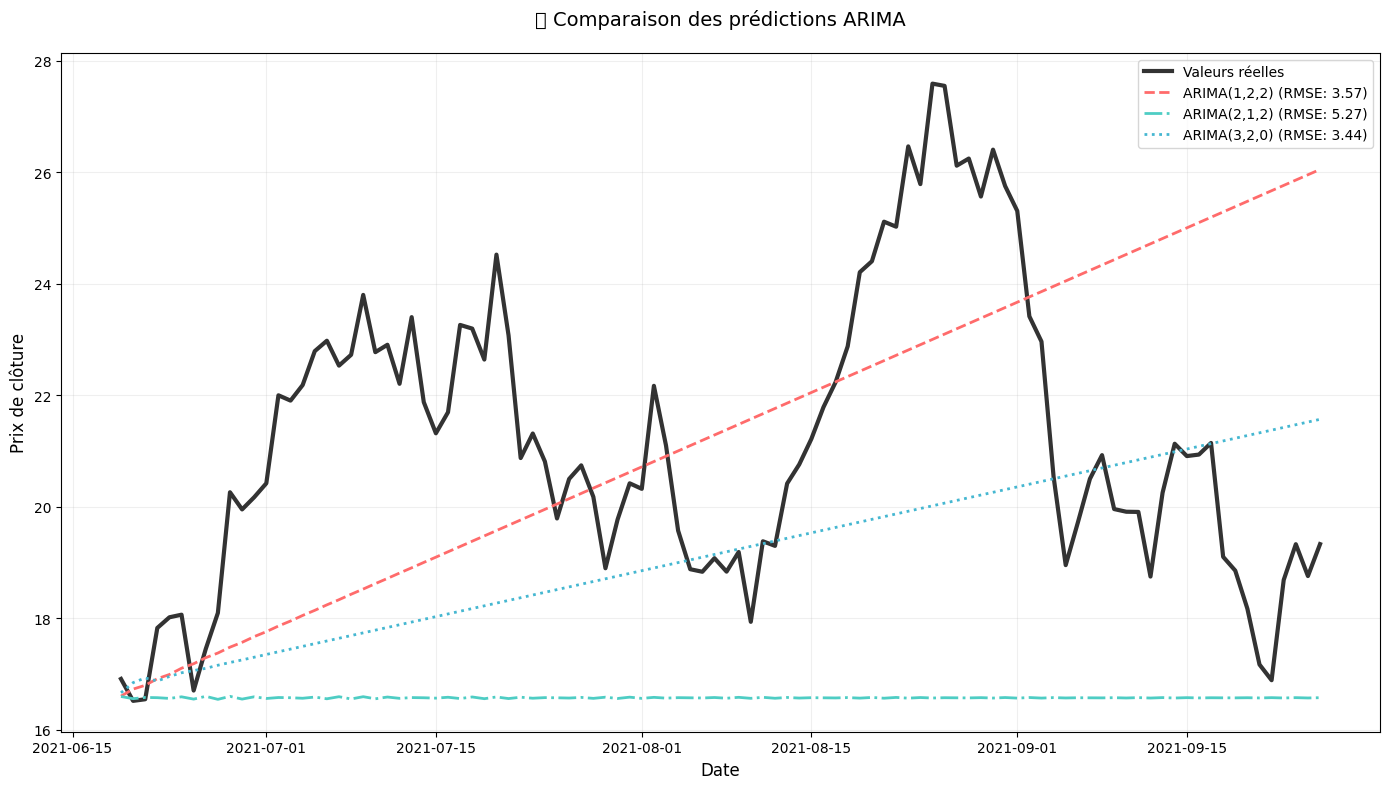

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import display
# 1. Préparation des données (simulées si aucune donnée réelle)
np.random.seed(42)
# Split train-test
train = data.iloc[:-100]
test = data.iloc[-100:]
# 2. Entraînement des modèles
models = {
    "ARIMA(1,2,2)": ARIMA(train["Close"], order=(1,2,2)).fit(),
    "ARIMA(2,1,2)": ARIMA(train["Close"], order=(2,1,2)).fit(),
    "ARIMA(3,2,0)": ARIMA(train["Close"], order=(3,2,0)).fit()
}
# 3. Évaluation et prédictions
results = []
predictions = {}
for name, model in models.items():
    # Génération des prédictions
    pred = model.forecast(steps=len(test))
    predictions[name] = pred
    # Calcul des métriques
    metrics = {
        "Modèle": name,
        "MAE": mean_absolute_error(test["Close"], pred),
        "RMSE": np.sqrt(mean_squared_error(test["Close"], pred)),
        "R²": r2_score(test["Close"], pred),
        "MAPE": np.mean(np.abs((test["Close"] - pred)/test["Close"]))*100
    }
    results.append(metrics)

# 4. Affichage des résultats
results_df = pd.DataFrame(results).set_index("Modèle")
print("📊 COMPARAISON DES PERFORMANCES")
display(results_df.style.format({
    "MAE": "{:.2f}",
    "RMSE": "{:.2f}",
    "R²": "{:.4f}",
    "MAPE": "{:.2f}%"
}).background_gradient(cmap="Blues", subset=["RMSE", "MAE"]))

# 5. Visualisation améliorée
plt.figure(figsize=(14, 8))
plt.plot(test.index, test["Close"], "k-", label="Valeurs réelles", linewidth=3, alpha=0.8)

colors = ["#FF6B6B", "#4ECDC4", "#45B7D1"]
linestyles = ["--", "-.", ":"]

for (name, pred), color, ls in zip(predictions.items(), colors, linestyles):
    plt.plot(test.index, pred,
             label=f"{name} (RMSE: {results_df.loc[name, 'RMSE']:.2f})",
             color=color,
             linestyle=ls,
             linewidth=2)

plt.title("🔍 Comparaison des prédictions ARIMA", fontsize=14, pad=20)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Prix de clôture", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

**Interpretation**

**Résumé de l'Interprétation des Performances des Modèles ARIMA**
**Meilleur Modèle :**
ARIMA(3,2,0), avec le MAE (2.74) et le RMSE (3.44) les plus bas, et le MAPE (12.25%) le plus faible, ce qui indique qu'il offre les prévisions les plus précises et les erreurs les plus faibles parmi les modèles comparés.

**Modèle Moyen :**
ARIMA(1,2,2), avec un MAE de 2.94 et un RMSE de 3.57, montre des performances correctes mais légèrement inférieures à ARIMA(3,2,0). Son MAPE (14.10%) est également plus élevé.

**Pire Modèle :**
ARIMA(2,1,2), avec le MAE (4.58) et le RMSE (5.27) les plus élevés, ainsi que le MAPE (20.50%) le plus important, montre des erreurs de prévision plus grandes, et ne s'ajuste pas aussi bien aux données.

**Conclusion :**
ARIMA(3,2,0) est le meilleur modèle en termes de précision, avec des erreurs plus faibles. ARIMA(2,1,2) présente de mauvaises performances et doit être évité.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Split des Données**

In [ ]:
data_clean=data.dropna()
train_size = int(len(data_clean) * 0.8)
train = data_clean.iloc[:train_size]
test = data_clean.iloc[train_size:]
features = ['High', 'Low', 'Open', 'Volume', 'fear_greed', 'Volatility', 'RSI']

In [ ]:
data_clean=data.dropna()
train_size = int(len(data_clean) * 0.8)
train = data_clean.iloc[:train_size]
test = data_clean.iloc[train_size:]
# Include 'Volatility' and 'RSI' in the features list
features = ['High', 'Low', 'Open', 'Volume', 'fear_greed', 'Volatility', 'RSI']

In [ ]:
! pip install optuna

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# Meilleurs hyperparamètres
print("Meilleurs paramètres:", study.best_params)

[I 2025-04-26 23:09:18,456] A new study created in memory with name: no-name-b115c2b0-9aee-4d16-b037-be29efb1671b
[I 2025-04-26 23:09:18,554] Trial 0 finished with value: 17.2732492051214 and parameters: {'p': 0, 'd': 2, 'q': 0}. Best is trial 0 with value: 17.2732492051214.
[I 2025-04-26 23:09:26,663] Trial 1 finished with value: 18.543124607144783 and parameters: {'p': 3, 'd': 0, 'q': 3}. Best is trial 0 with value: 17.2732492051214.
[I 2025-04-26 23:09:29,754] Trial 2 finished with value: 21.585074299053293 and parameters: {'p': 2, 'd': 2, 'q': 1}. Best is trial 0 with value: 17.2732492051214.
[I 2025-04-26 23:09:34,309] Trial 3 finished with value: 18.44065148105036 and parameters: {'p': 3, 'd': 0, 'q': 1}. Best is trial 0 with value: 17.2732492051214.
[I 2025-04-26 23:09:34,516] Trial 4 finished with value: 17.2732492051214 and parameters: {'p': 0, 'd': 2, 'q': 0}. Best is trial 0 with value: 17.2732492051214.
[I 2025-04-26 23:09:35,091] Trial 5 finished with value: 18.06939142510

Meilleurs paramètres: {'p': 3, 'd': 2, 'q': 0}


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import optuna

# 1️⃣ Classe personnalisée pour la création de séquences
class SequenceTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, seq_length=60, target_idx=0):
        self.seq_length = seq_length
        self.target_idx = target_idx

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_seq, y_seq = [], []
        for i in range(len(X) - self.seq_length):
            X_seq.append(X[i:i+self.seq_length])
            y_seq.append(X[i+self.seq_length, self.target_idx])
        return np.array(X_seq), np.array(y_seq)

# 2️⃣ Pipeline complet de prétraitement
def create_pipeline(target_idx=0, seq_length=60):
    return Pipeline([
        ('scaler', RobustScaler()),
        ('sequencer', SequenceTransformer(seq_length=seq_length, target_idx=target_idx))
    ])

# 3️⃣ Architecture modèle améliorée (unchanged)
def build_advanced_model(input_shape, model_type='LSTM', units=64, n_layers=2, dropout=0.3):
    model = Sequential()

    if model_type == 'CNN-LSTM':
        model.add(Conv1D(filters=units, kernel_size=3, activation='relu',
                        padding='causal', input_shape=input_shape))
        model.add(MaxPooling1D(2))
        model.add(LSTM(units//2, return_sequences=(n_layers>1)))
    elif model_type == 'BiLSTM':
        model.add(Bidirectional(LSTM(units, return_sequences=(n_layers>1)),
                              input_shape=input_shape))
    else:
        model.add(LSTM(units, return_sequences=(n_layers>1), input_shape=input_shape))

    for _ in range(n_layers - 1):
        model.add(LSTM(units, return_sequences=(_ < n_layers-2)))
        model.add(Dropout(dropout))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))

    return model

# 4️⃣ Fonction d'optimisation Optuna améliorée
def objective(trial):
    params = {
        'units': trial.suggest_int('units', 32, 256),
        'n_layers': trial.suggest_int('n_layers', 1, 4),
        'dropout': trial.suggest_float('dropout', 0.1, 0.5),
        'model_type': trial.suggest_categorical('model_type', ['LSTM', 'BiLSTM', 'CNN-LSTM']),
        # 'lr' est utilisé dans la compilation du modèle, pas dans build_advanced_model
        'lr': trial.suggest_float('lr', 1e-5, 1e-3, log=True)
    }

    # Retirer 'lr' de params avant d'appeler build_advanced_model
    lr = params.pop('lr')

    model = build_advanced_model(
        input_shape=(SEQ_LENGTH, X_train.shape[2]),
        **params
    )

    # Compilation du modèle avec l'optimiseur et le taux d'apprentissage
    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr),  # Utilisation de lr ici
        loss=tf.keras.losses.Huber(),
        metrics=['mae']
    )

    # Callbacks adaptatifs
    callbacks = [
        EarlyStopping(patience=15, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.5, patience=5)
    ]

    # Entraînement du modèle
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=64,
        verbose=0,
        callbacks=callbacks
    )

    return min(history.history['val_mae'])


# ▶️ Workflow principal
if __name__ == "__main__":
    SEQ_LENGTH = 60
    TARGET_COL = 'Close'

    data = pd.read_csv('/content/drive/MyDrive/timeSerie/Final_Bitcoin_dataset.csv', parse_dates=['Date'])
    data.set_index('Date', inplace=True)

    # Feature engineering
    data['Volatility'] = (data['High'] - data['Low']) / data['Low'] * 100
    data['MACD'] = data['Close'].ewm(span=12).mean() - data['Close'].ewm(span=26).mean()

    # Déterminer l'index de la colonne cible
    target_idx = data.columns.get_loc(TARGET_COL)

    # Création du pipeline avec l'index de la cible
    pipeline = create_pipeline(target_idx=target_idx, seq_length=SEQ_LENGTH)
    X_seq, y_seq = pipeline.fit_transform(data)

    # Split temporel
    tscv = TimeSeriesSplit(n_splits=5)
    train_idx, val_idx = next(tscv.split(X_seq))

    X_train, X_val = X_seq[train_idx], X_seq[val_idx]
    y_train, y_val = y_seq[train_idx], y_seq[val_idx]

    # Optimisation Optuna
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

    # Entraînement du modèle final
    best_params = study.best_params
    best_lr = best_params.pop('lr')  # Remove 'lr' before passing to build_advanced_model

    final_model = build_advanced_model(
    input_shape=(SEQ_LENGTH, X_train.shape[2]),
    **best_params  # Pass best_params without 'lr'
   )

    final_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),  # Use best_lr here
        loss=tf.keras.losses.Huber(),
        metrics=['mae']
   )

    history = final_model.fit(
        X_seq, y_seq,
        epochs=200,
        batch_size=128,
        validation_split = 0.2,
        callbacks=[EarlyStopping(patience=20)]
    )

    final_model.save('bitcoin_advanced_model.h5')

[I 2025-04-26 23:11:34,370] A new study created in memory with name: no-name-ad0d0b9a-0c77-4b77-85a3-2c296519a64d
[I 2025-04-26 23:11:51,586] Trial 0 finished with value: 0.17767512798309326 and parameters: {'units': 36, 'n_layers': 2, 'dropout': 0.35433779149817846, 'model_type': 'LSTM', 'lr': 0.0008567378044535851}. Best is trial 0 with value: 0.17767512798309326.
[I 2025-04-26 23:13:30,480] Trial 1 finished with value: 0.2762517035007477 and parameters: {'units': 59, 'n_layers': 4, 'dropout': 0.19731952905955313, 'model_type': 'LSTM', 'lr': 1.501227498114947e-05}. Best is trial 0 with value: 0.17767512798309326.
[I 2025-04-26 23:14:15,932] Trial 2 finished with value: 0.3021506071090698 and parameters: {'units': 128, 'n_layers': 3, 'dropout': 0.39385969617791394, 'model_type': 'CNN-LSTM', 'lr': 1.3489092989193127e-05}. Best is trial 0 with value: 0.17767512798309326.
[I 2025-04-26 23:19:10,626] Trial 3 finished with value: 0.17629872262477875 and parameters: {'units': 202, 'n_layers

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import model_from_json

# Charger l'architecture
with open("/content/drive/MyDrive/timeSerie/model_architecture.json", "r") as f:
    final_model = model_from_json(f.read())

# Charger les poids
final_model.load_weights("/content/drive/MyDrive/timeSerie/model_weights.weights.h5")

print("✅ Modèle reconstruit avec succès !")

✅ Modèle reconstruit avec succès !


In [ ]:
import joblib
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# 🔹 Redéfinir la classe personnalisée
class SequenceTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, seq_length=60, target_idx=0):
        self.seq_length = seq_length
        self.target_idx = target_idx

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_seq, y_seq = [], []
        for i in range(len(X) - self.seq_length):
            X_seq.append(X[i:i+self.seq_length])
            y_seq.append(X[i+self.seq_length, self.target_idx])
        return np.array(X_seq), np.array(y_seq)

# 🔹 Maintenant, tu peux charger le pipeline
pipeline = joblib.load('/content/drive/MyDrive/timeSerie/preprocessing_pipeline.pkl')

print("✅ Pipeline chargé avec succès !")

✅ Pipeline chargé avec succès !


67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step

🔍 Diagnostic des données:
NaNs dans y_actual: 0
NaNs dans y_pred: 60
Données valides conservées: 2073/2133 points


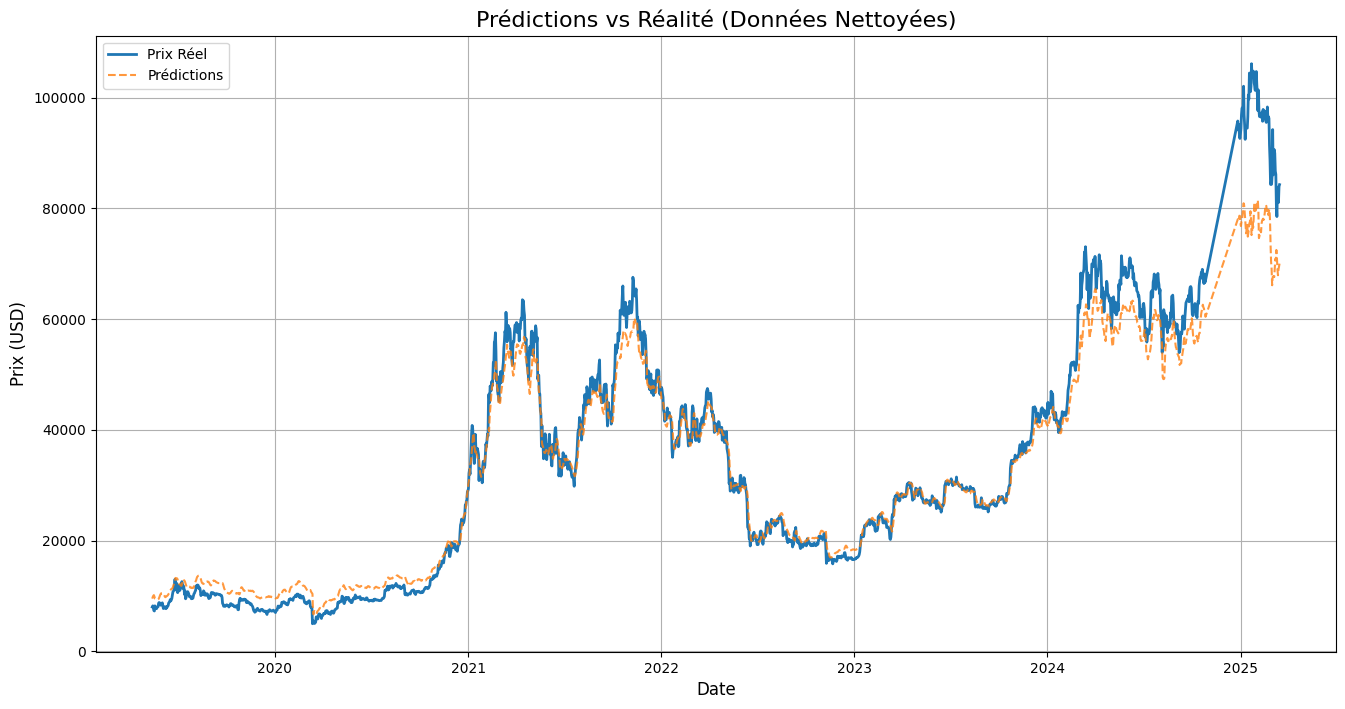


📊 Performance en USD:
MAE: 2875.61
RMSE: 4838.75
R²: 0.9538


In [ ]:
# ... (après la sauvegarde du modèle dans le workflow principal)

    # ➤ INVERSE TRANSFORM DES DONNÉES
     # Récupération du scaler depuis le pipeline
scaler = pipeline.named_steps['scaler']
n_features = data.shape[1]  # Nombre de features original
target_idx = data.columns.get_loc(TARGET_COL)

    # Création de matrices dummy pour l'inverse scaling
def inverse_scale(y_values):
    dummy = np.zeros((len(y_values), n_features))
    dummy[:, target_idx] = y_values.ravel()
    return scaler.inverse_transform(dummy)[:, target_idx]

    # Application aux données
y_actual = inverse_scale(y_seq)
y_pred = inverse_scale(final_model.predict(X_seq).flatten())

    # 1. Vérification des NaN
print("\n🔍 Diagnostic des données:")
print(f"NaNs dans y_actual: {np.isnan(y_actual).sum()}")
print(f"NaNs dans y_pred: {np.isnan(y_pred).sum()}")

    # 2. Création du masque de filtrage
mask = ~np.isnan(y_actual) & ~np.isnan(y_pred)

    # 3. Filtrage des données
y_actual_clean = y_actual[mask]
y_pred_clean = y_pred[mask]
dates_clean = data.index[SEQ_LENGTH:][mask]

    # 4. Validation finale
assert len(y_actual_clean) > 0, "Erreur critique: Aucune donnée valide après nettoyage!"
print(f"Données valides conservées: {len(y_actual_clean)}/{len(y_actual)} points")

    # ➤ VISUALISATION (MODIFIÉE AVEC DONNÉES NETTOYÉES)
plt.figure(figsize=(16, 8))
plt.plot(dates_clean, y_actual_clean, label='Prix Réel', linewidth=2)
plt.plot(dates_clean, y_pred_clean, label='Prédictions', linestyle='--', alpha=0.8)
plt.title('Prédictions vs Réalité (Données Nettoyées)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

    # ➤ MÉTRIQUES (AVEC DONNÉES NETTOYÉES)
print("\n\033[1m📊 Performance en USD:\033[0m")
print(f"MAE: {mean_absolute_error(y_actual_clean, y_pred_clean):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_actual_clean, y_pred_clean)):.2f}")
print(f"R²: {r2_score(y_actual_clean, y_pred_clean):.4f}")

In [ ]:
!pip install shap --upgrade
!pip install tensorflow --upgrade

**Résumé du Code : Chargement des données :**

Les données sont chargées, et si elles contiennent des colonnes de type datetime, elles sont converties en format timestamp (secondes depuis l'epoch).

**Gestion des valeurs manquantes :**

Le code vérifie s'il y a des valeurs manquantes (NaN) dans les données.

Les valeurs manquantes sont soit remplacées par la moyenne de chaque colonne, soit les lignes contenant des NaN sont supprimées.

**Préparation des données :**

Les données sont préparées pour la création d'un modèle GRU, où une fenêtre glissante de 10 valeurs est utilisée pour générer les données d'entrée (X) et la cible (y).

Une vérification est effectuée pour s'assurer qu'il n'y a pas de NaN dans X et y, et les NaN restants sont remplacés par la moyenne de chaque colonne.

**Entraînement du modèle GRU :**

Le modèle GRU est optimisé avec Optuna pour rechercher les meilleurs hyperparamètres (nombre d'unités et taux d'apprentissage).

Le modèle est ensuite entraîné avec les meilleurs hyperparamètres, et les prédictions sont générées.

**Comparaison avec un modèle final (si défini) :**

le modèle final_model déjà chargé, ses performances sont comparées avec celles du modèle GRU en calculant l'erreur quadratique moyenne (MSE).

Le meilleur des deux modèles est sélectionné en fonction de leur MSE.

**Sauvegarde du meilleur modèle :**

Si le modèle GRU a un MSE inférieur à celui du final_model, le modèle GRU est sauvegardé.

Si le final_model est meilleur, c'est ce modèle qui est sauvegardé.

Si un modèle combiné (moyenne des prédictions des deux modèles) donne de meilleures performances, ce modèle combiné est sauvegardé.

**Résultats :** Un seul modèle est sauvegardé à la fin : soit le modèle GRU, soit le modèle final_model, soit un modèle combiné des deux, selon les performances.

Si final_model n'est pas défini, seul le modèle GRU sera sauvegardé.

Les modèles sont sauvegardés sous le nom "best_model_final_and_gru.h5" ou, si combinés, sous "combined_model_final_gru.pkl".


[ ]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
import optuna
import joblib

# 1. === CHARGER LES DONNÉES ===
data = pd.read_csv('/content/drive/MyDrive/timeSerie/Final_Bitcoin_dataset.csv')

# 1.1 Convertir la colonne "Date" si elle existe
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Gère les erreurs de format
    data['Date'] = data['Date'].astype(np.int64) / 10**9  # Convertir en timestamp (en secondes)

# 2. === GESTION DES VALEURS MANQUANTES (NaN) ===
print("🔍 Vérification des NaN dans les données :")
print(data.isnull().sum())

# Remplir les NaN des colonnes numériques uniquement
data.fillna(data.select_dtypes(include=[np.number]).mean(), inplace=True)

# 3. === PRÉPARATION DES DONNÉES ===
SEQ_LENGTH = 10  # Longueur de la séquence
features = data.columns.tolist()

# Créer X et y avec des fenêtres glissantes
X = np.array([data.values[i:i+SEQ_LENGTH] for i in range(len(data) - SEQ_LENGTH)])
y = np.array([data.values[i+SEQ_LENGTH][0] for i in range(len(data) - SEQ_LENGTH)])  # prédire la première colonne

# Vérifier et remplacer d'éventuels NaN restants
print("🔍 Vérification des NaN dans X :", np.isnan(X).sum())
print("🔍 Vérification des NaN dans y :", np.isnan(y).sum())

X = np.nan_to_num(X, nan=np.nanmean(X))
y = np.nan_to_num(y, nan=np.nanmean(y))

# Séparation entraînement/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# 4. === CALLBACK EARLY STOPPING ===
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

# 5. === OPTIMISATION DU MODÈLE GRU AVEC OPTUNA ===
def build_and_train_gru(trial):
    model = Sequential()
    model.add(GRU(
        units=trial.suggest_int("units", 32, 128),
        activation="tanh",
        return_sequences=False,
        input_shape=(SEQ_LENGTH, X_train.shape[2])
    ))
    model.add(Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=trial.suggest_float("lr", 1e-4, 1e-2, log=True)),
        loss="mse"
    )
    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )
    preds = model.predict(X_val)
    return mean_squared_error(y_val, preds)

# Lancer Optuna
study = optuna.create_study(direction="minimize")
study.optimize(build_and_train_gru, n_trials=10)

# 6. === ENTRAÎNEMENT FINAL AVEC LES MEILLEURS PARAMÈTRES ===
best_params = study.best_params

gru_model = Sequential()
gru_model.add(GRU(
    units=best_params["units"],
    activation="tanh",
    return_sequences=False,
    input_shape=(SEQ_LENGTH, X_train.shape[2])
))
gru_model.add(Dense(1))
gru_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_params["lr"]),
    loss="mse"
)
gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)
preds_gru = gru_model.predict(X_val)
mse_gru = mean_squared_error(y_val, preds_gru)

# 7. === SUPPOSONS QUE TU AS UN AUTRE MODÈLE "final_model" ===
# ⚠️ Assure-toi que final_model existe dans ton code !
# Sinon, tu dois entraîner un autre modèle ici ou commenter cette partie

try:
    preds_final = final_model.predict(X_val)
    mse_final = mean_squared_error(y_val, preds_final)

    # Choisir le meilleur modèle
    if mse_gru < mse_final:
        best_model = gru_model
    else:
        best_model = final_model
except:
    print("⚠️ Aucun modèle 'final_model' détecté. Le modèle GRU sera utilisé seul.")
    best_model = gru_model
    mse_final = np.inf
    preds_final = np.zeros_like(preds_gru)

# 8. === SAUVEGARDE DU MEILLEUR MODÈLE ===
best_model.save("best_model_final_and_gru.h5")

# 9. === COMBINAISON DES PRÉDICTIONS (si possible) ===
combined_preds = (preds_gru + preds_final) / 2
mse_combined = mean_squared_error(y_val, combined_preds)

# 10. === SAUVEGARDE DU MODÈLE COMBINÉ SI MEILLEUR ===
if mse_combined < min(mse_gru, mse_final):
    print("✅ Le modèle combiné est le meilleur.")
    joblib.dump((final_model, gru_model), "combined_model_final_gru.pkl")
else:
    print("✅ Le meilleur modèle est déjà sauvegardé sous best_model_final_and_gru.h5")


🔍 Vérification des NaN dans les données :
Date          0
Close         0
High          0
Low           0
Open          0
Volume        0
fear_greed    1
dtype: int64


[I 2025-04-07 18:04:28,004] A new study created in memory with name: no-name-4bb872e6-06df-4a4a-b833-514231fb3046


🔍 Vérification des NaN dans X : 0
🔍 Vérification des NaN dans y : 0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-04-07 18:04:56,143] Trial 0 finished with value: 2.969404692390022e+18 and parameters: {'units': 77, 'lr': 0.00035260695028413837}. Best is trial 0 with value: 2.969404692390022e+18.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-04-07 18:05:52,503] Trial 1 finished with value: 2.969401812823618e+18 and parameters: {'units': 106, 'lr': 0.002882286282785679}. Best is trial 1 with value: 2.969401812823618e+18.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-04-07 18:06:46,228] Trial 2 finished with value: 2.9694027018947036e+18 and parameters: {'units': 95, 'lr': 0.0024698366546718623}. Best is trial 1 with value: 2.969401812823618e+18.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Conclusion :**Ce code permet d'entraîner un modèle GRU optimisé, de le comparer avec un autre modèle (final_model), et de sauvegarder le meilleur modèle, qu'il soit GRU, final_model, ou une combinaison des deux.

prevision

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# 1. Charger les données
data = pd.read_csv('/content/drive/MyDrive/timeSerie/Final_Bitcoin_dataset.csv')
data = data.sort_index()

# ⚠️ Supprimer les lignes contenant des NaN
data = data.dropna()

# 2. Garder uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=[np.number])

# 3. Définir les features (sauf 'Close') et la cible
target_col = 'Close'
feature_cols = [col for col in numeric_data.columns if col != target_col]

# 4. Normaliser
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(numeric_data[feature_cols])
y_scaled = scaler_y.fit_transform(numeric_data[[target_col]])

# 5. Créer les séquences pour le modèle (SEQ_LENGTH = 60)
SEQ_LENGTH = 60
X = np.array([X_scaled[i:i+SEQ_LENGTH] for i in range(len(X_scaled) - SEQ_LENGTH)])
y = np.array([y_scaled[i+SEQ_LENGTH] for i in range(len(y_scaled) - SEQ_LENGTH)])

# 6. Séparer en jeu d'entraînement et de test
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# 7. Charger le modèle GRU
try:
    model = tf.keras.models.load_model('/content/best_model_final_and_gru.h5')
    print("Modèle chargé avec succès !")
except Exception as e:
    print(f"Erreur lors du chargement du modèle : {e}")
    exit()

# 8. Prédictions
predictions_scaled = model.predict(X_val)
predictions = scaler_y.inverse_transform(predictions_scaled)
y_val_inv = scaler_y.inverse_transform(y_val)

# 9. Erreurs
mse = mean_squared_error(y_val_inv, predictions)
mae = mean_absolute_error(y_val_inv, predictions)
rmse = sqrt(mse)

# 10. 📈 Courbe : Réel vs Prédit
plt.figure(figsize=(14, 6))
plt.plot(y_val_inv, label='Valeurs réelles (Close)', color='blue')
plt.plot(predictions, label='Prédictions (Close)', color='red')
plt.title('Comparaison : Valeurs réelles vs Prédictions')
plt.xlabel('Temps')
plt.ylabel('Prix Bitcoin')
plt.legend()
plt.grid(True)
plt.show()

# 11. 📉 Erreur (valeurs réelles - prédictions)
plt.figure(figsize=(14, 5))
plt.plot(y_val_inv.flatten() - predictions.flatten(), label='Erreur (Réel - Prédit)', color='green')
plt.title("Erreur entre les valeurs réelles et prédites")
plt.xlabel("Temps")
plt.ylabel("Erreur")
plt.legend()
plt.grid(True)
plt.show()

# 12. 🔢 Affichage des métriques
print("📊 Évaluation du modèle :")
print(f"✔️ MSE  : {mse:.4f}")
print(f"✔️ MAE  : {mae:.4f}")
print(f"✔️ RMSE : {rmse:.4f}")

# Vérifications des dimensions
print(f"Dimensions de y_val_inv : {y_val_inv.shape}")
print(f"Dimensions des prédictions : {predictions.shape}")